<a href="https://colab.research.google.com/github/shahid863/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_train = pd.read_csv("/content/train.csv")  
data_test = pd.read_csv("/content/test.csv") 

In [5]:
data_train.shape

(700, 2)

In [6]:
data_test.shape

(300, 2)

In [8]:
data_train.isna().sum()

x    0
y    1
dtype: int64

In [9]:
data_train =  data_train.dropna()  #dropped the value

In [10]:
data_train.shape

(699, 2)

In [11]:
data_test.isna().sum()

x    0
y    0
dtype: int64

Vizualisation

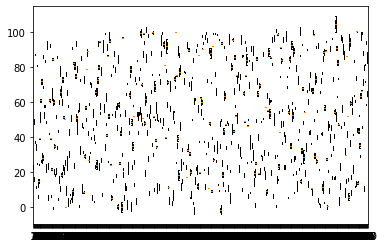

In [12]:
plt.boxplot(data_train)
plt.show()

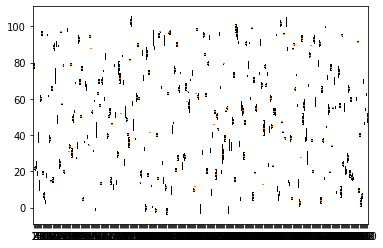

In [13]:
plt.boxplot(data_test)
plt.show()

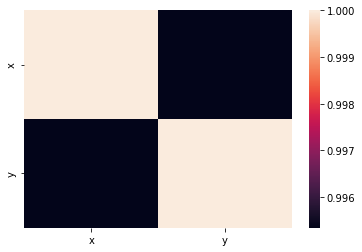

In [14]:
sns.heatmap(data_train.corr())
plt.show()

Splitting as X and Y

In [15]:
x_train = data_train['x']
x_train.head()

0    24.0
1    50.0
2    15.0
3    38.0
4    87.0
Name: x, dtype: float64

In [16]:
y_train = data_train['y']

In [18]:
x_test = data_test['x']

In [19]:
y_test = data_test['y']

Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mn= MinMaxScaler()

In [24]:
x_train = np.array(x_train).reshape(-1,1)

In [25]:
mn.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [26]:
x_train = mn.transform(x_train)

In [27]:
x_train.shape

(699, 1)

In [28]:
x_test = np.array(x_test).reshape(-1,1)

In [29]:
x_test.shape

(300, 1)

In [30]:
x_test = mn.transform(x_test) 
x_test.shape

(300, 1)

In [31]:
y_train.shape

(699,)

Build the model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
slr=LinearRegression()

In [34]:
slr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred = slr.predict(x_test)

In [36]:
y_pred

array([76.94327594, 20.90651855, 21.90717494, 19.90586217, 35.91636428,
       14.90258026, 61.93343021, 94.95509081, 19.90586217,  4.89601644,
        3.89536006, 18.90520579, 95.95574719, 61.93343021, 35.91636428,
       14.90258026, 64.93539936, 13.90192388, 86.94983976, 68.93802488,
       88.95115252, 50.92621001, 88.95115252, 26.91045685, 96.95640358,
       57.93080468, 78.9445887 , 20.90651855, 92.95377805, 26.91045685,
       98.95771634, 30.91308237, 32.91439514, 79.94524508, 27.91111323,
       46.92358448, 52.92752277, 68.93802488, 27.91111323, 32.91439514,
       90.95246528, 70.93933765, 49.92555363, 75.94261956,  3.89536006,
       36.91702066, 69.93868127, 67.9373685 , 39.91898981, 34.9157079 ,
       93.95443443, 87.95049614, 51.92686639, 30.91308237, 58.93146107,
       -0.10726546, 38.91833343, 63.93474297, 68.93802488, 56.9301483 ,
       12.9012675 , 71.93999403, 75.94261956, 60.93277383, 81.94655785,
       17.90454941, 40.91964619, 49.92555363, 54.92883554, 12.90


Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
print(mean_squared_error(y_pred,y_test))

9.432922192039321


In [39]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.9883666162358453


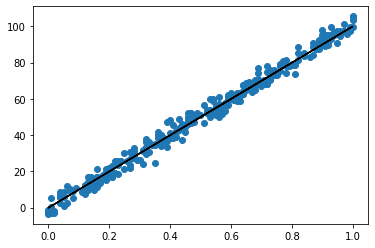

In [40]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color="black")
plt.show()